In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

# Question 1
### Part A
The below function: plot_norm_ball() is the required function that plots a norm ball with given p.

In [2]:
def plot_norm_ball(p_):
    y_pos = np.linspace(0,1,101,endpoint=True)
    x_pos = (1 - y_pos ** p_) ** (1 / p_)
    x_neg = -x_pos
    y_neg = -y_pos
    plt.plot(x_pos, y_pos, 'g')
    plt.plot(x_neg, y_neg, 'g')
    plt.plot(x_pos, y_neg, 'g')
    plt.plot(x_neg, y_pos, 'g')
    ax = plt.gca()
    ax.set_aspect(1)
    plt.grid()
    plt.title("p = " + str(p_))
    return plt

We first test with p = 2, i.e. p $\ge$ 1.

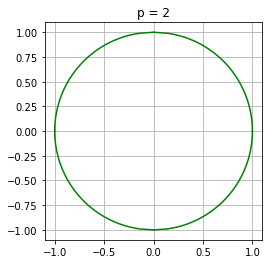

In [3]:
a = plot_norm_ball(2)
a.show()

Now we test with p = 0.5, i.e. 0 < p < 1.

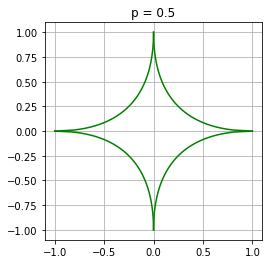

In [4]:
a = plot_norm_ball(0.5)
a.show()

### Part B

Yes it is very clear from the below that for p $\ge$ 1, the norm balls are convex.

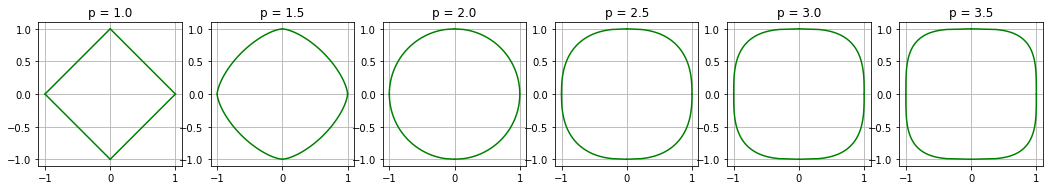

In [5]:
n = 6
plt.figure(figsize=[3*n,3])
for i in range(1,n+1):
    plt.subplot(1, n, i)
    plt = plot_norm_ball(i/2+0.5)

plt.show()

From the below, it can be seen that for 0 < p < 1, the norm balls are not convex. This is because below p = 1, the norm balls start becoming deflated.

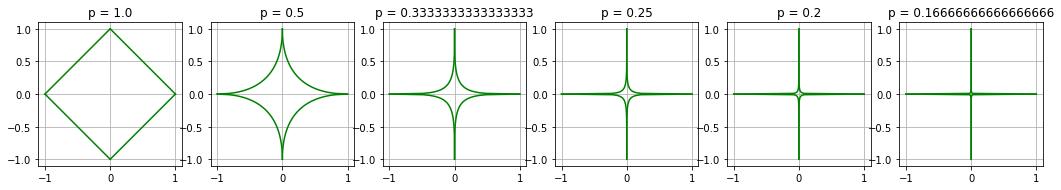

In [6]:
n = 6
plt.figure(figsize=[3*n,3])
for i in range(1,n+1):
    plt.subplot(1, n, i)
    plt = plot_norm_ball(1/i)

plt.show()

# Question 2
To show that the space of all continuous continuous functions on the closed interval [0,1] is incomplete with respect to the metric derived from the $\mathcal{L}$1 norm, we need to find a sequence of functions that is cauchy but that does not converge in $\mathbb{C}$[0,1].

Let $\{f_n(x)\}_n = x^{\frac{1}{n}}$ be a sequence of functions in $\mathbb{C}$[0,1]. We can easily see that it is a valid sequence of functions as $x^{\frac{1}{n}$ is continuous for all $n \in \mathbb{N}$. Next we find the limit of this sequence as $n \to \infty$. For $x \ne 0$, $x^{\frac{1}{n}} \to 1$ as $n \to \infty$. For $x = 0$, $x^{\frac{1}{n}} \to 0$ as $n \to \infty$. Thus we can say that the sequence $\{f_n(x)\}_n$ does not converge in $\mathbb{C}$[0,1] as $\mathbb{C}$[0,1] has only continuous functions and $\{f_n(x)\}_n$ is not converging to a continuous function as $n \to \infty$.

Next we show that $\{f_n(x)\}_n$ is cauchy. For this, we need to find $N_0$ for any $\epsilon > 0$ such that $||f_n(x)-f_m(x)|| < \epsilon\; \forall n,m > N_0$. Without loss of generality, let $n > m$. Then $x^{\frac{1}{n}} < x^{\frac{1}{m}}$. Thus
\begin{align}
||f_n(x)-f_m(x)|| &= \int_0^1|f_n(x)-f_m(x)|dx\\
                  &= \int_0^1|x^{\frac{1}{n}}-x^{\frac{1}{m}}|dx\\
                  &= \int_0^1(x^{\frac{1}{n}}-x^{\frac{1}{m}})dx\\
                  &= \dfrac{n}{n+1}-\dfrac{m}{m+1}\\
                  &= \dfrac{1}{m+1}-\dfrac{1}{n+1}\\
                  &< \dfrac{1}{m+1}\\
                  &< \dfrac{1}{m}
\end{align}
Thus if we choose an $N_0$ greater than $\dfrac{1}{\epsilon}$, we will have that $\dfrac{1}{m} < \epsilon$. Thus $||f_n(x)-f_m(x)|| < \epsilon$. This proves that $\{f_n(x)\}_n$ is cauchy. But as we saw earlier, it does not converge in $\mathbb{C}$[0,1]. Thus we can conclude that $\mathbb{C}$[0,1] is not a complete metric space with respect to the metric derived from the $\mathcal{L}$1 norm.

In the following cell, we shall plot the sequence of functions $\{f_n(x)\}_n$.

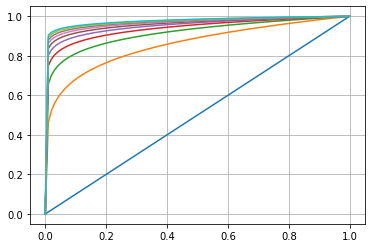

In [7]:
n = 50
x = np.linspace(0,1,101,endpoint=True)
for i in range(1,n+1,5):
    y = x**(1/i)
    plt.plot(x, y)

plt.grid()
plt.show()

# Question 3
### Part A
The below function: entropy() takes PMF as input and outputs entropy.

In [8]:
def entropy(pmf):
    pmf = np.clip(pmf, 1e-15,1)
    return -np.sum(pmf*np.log2(pmf))

### Part B
In below cell, we calculate the entropy for a Bernoulli random variable with different values for p. We plot these entropies. It is observed that this plot attains its maximum at p=0.5.

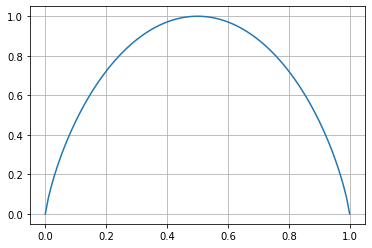

Maximum entropy is observed for p = 0.5


In [9]:
p = np.linspace(0,1,101, endpoint=True)
fs = np.array([p,1-p])
entropies = np.zeros(101)
for i in range(101):
    entropies[i] = entropy(fs[:,i])
plt.plot(p, entropies)
plt.grid()
plt.show()
print("Maximum entropy is observed for p =", p[np.argmax(entropies)])

# Question 4
### Part A
The below function: norm_img_hist() takes an image as input and plots the normalised histogram of its pixels.

In [10]:
def norm_img_hist(im):
    bars = np.arange(256)
    un, cts = np.unique(im.ravel(), return_counts=True)
    values = np.zeros(256)
    values[un] = cts / np.prod(np.shape(im))
    plt.bar(bars, values, width=1)
    return plt

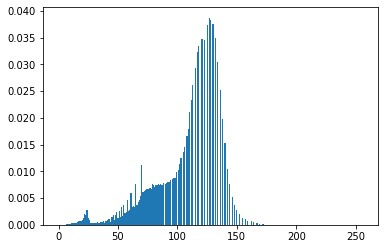

In [11]:
img = image.imread('7.1.01.tiff')
a = norm_img_hist(img)
a.show()

### Part B
The below cell plots the normalised histogram and displays entropy for 9 different images. In general, it can be observed that if the histogram peak height is high, then the entropy is low. If the histogram peak height is low, then the entropy is high. This is because a high peak height indicates more probability in a smaller region and hence less randomness.

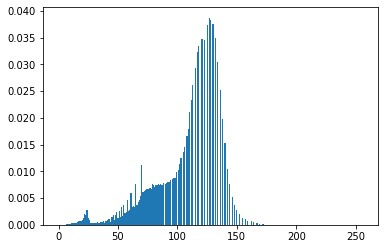

entropy = 6.027414821005897


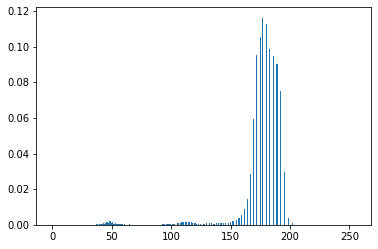

entropy = 4.004499444672442


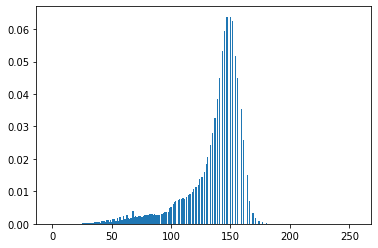

entropy = 5.495739988894448


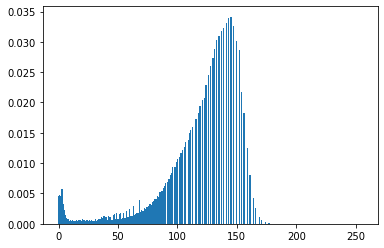

entropy = 6.107418111177388


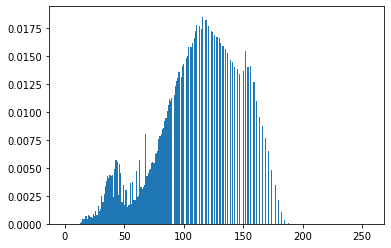

entropy = 6.563195555933683


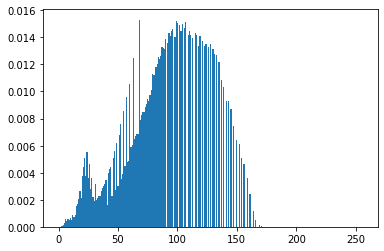

entropy = 6.695283380716706


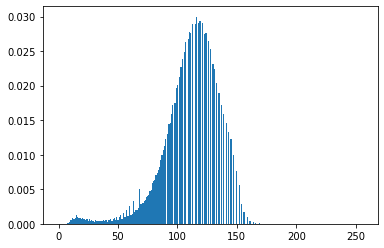

entropy = 5.99159876329032


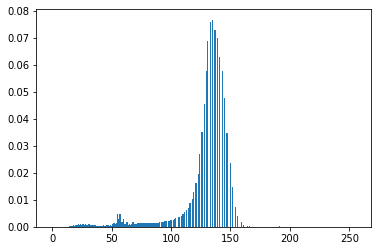

entropy = 5.053447996737026


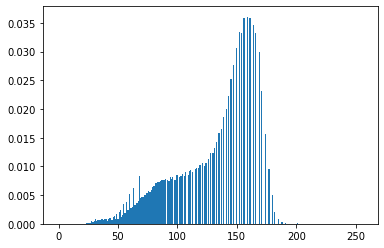

entropy = 6.189813703506665


In [12]:
s = 1
for i in range(9):
    img = image.imread('7.1.0'+str(s)+'.tiff')
    a = norm_img_hist(img)
    a.show()
    unique, counts = np.unique(img.ravel(), return_counts=True)
    probs = np.zeros(256)
    probs[unique] = counts/np.prod(np.shape(img))
    s += 1
    print("entropy =", entropy(probs))

# Question 5
### Part A
The below function: norm_joint_hist() takes two images as input and returns their joint pmf as well as plot their joint histogram.

In [13]:
def norm_joint_hist(im1, im2):
    joint_hist = np.zeros([256, 256])
    im1 = im1.ravel()
    im2 = im2.ravel()
    np.add.at(joint_hist, (im1, im2), 1)
    joint_hist /= np.sum(joint_hist)

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(projection='3d')

    _xx, _yy = np.meshgrid(np.arange(256), np.arange(256))
    _x, _y = _xx.ravel(), _yy.ravel()

    top = joint_hist.flatten()
    bottom = np.zeros_like(top)
    width = depth = 1

    ax1.bar3d(_x, _y, bottom, width, depth, top, shade=True)
    ax1.set_title('Shaded')

    plt.show()
    return joint_hist

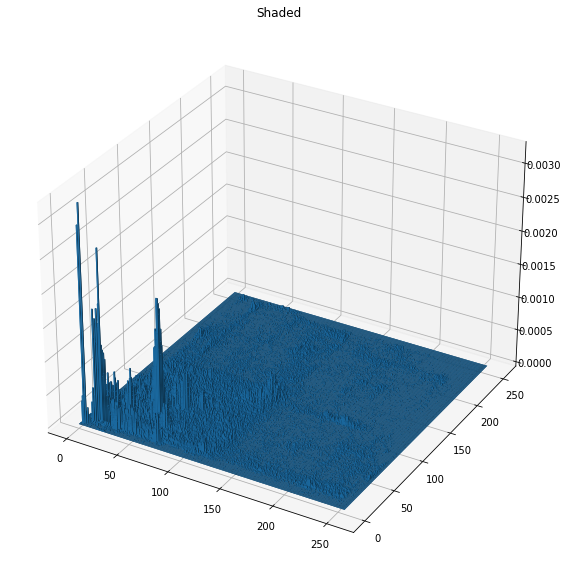

In [14]:
left = image.imread('left.png')
left = np.int_(left*255)
right = image.imread('right.png')
right = np.int_(right*255)
a = norm_joint_hist(left, right)

### Part B
The below function: joint_entropy() takes joint pmf as input and returns the joint entropy.

In [15]:
def joint_entropy(pmf):
    return entropy(pmf)

### Part C
Below, we test our joint entropy function using the pmf calculated in problem 5(a)

In [16]:
joint_entropy(a)

13.67520326532464

# Question 6
### Part A
The below function: conditional_pmf() returns the conditional PMF given the index and value of conditioning variable.

In [17]:
def conditional_pmf(joint_pmf, index, value):
    if index == 1:
        return joint_pmf[:, value] / (np.sum(joint_pmf[:, value])+1e-15)
    else:
        return joint_pmf[value, :] / (np.sum(joint_pmf[value, :])+1e-15)

In [18]:
c_pmf = conditional_pmf(a, 0, 10)
c_pmf

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00057537, 0.00057537, 0.03222094, 0.02474108,
       0.10759494, 0.08112773, 0.0287687 , 0.03739931, 0.04142693,
       0.02301496, 0.01611047, 0.0132336 , 0.01898734, 0.01611047,
       0.02301496, 0.01495972, 0.01208285, 0.00920598, 0.01438435,
       0.00575374, 0.00460299, 0.00632911, 0.00978136, 0.01438435,
       0.01841197, 0.02186421, 0.01783659, 0.01956272, 0.02013809,
       0.00460299, 0.00575374, 0.00575374, 0.00978136, 0.00460299,
       0.00747986, 0.00978136, 0.00517837, 0.00575374, 0.00632911,
       0.00863061, 0.00632911, 0.00632911, 0.00345224, 0.00690449,
       0.01495972, 0.00402762, 0.00690449, 0.00690449, 0.00345224,
       0.00575374, 0.0023015 , 0.00402762, 0.00172612, 0.00115075,
       0.00287687, 0.0023015 , 0.00863061, 0.00517837, 0.00345224,
       0.00402762, 0.00345224, 0.00345224, 0.00287687, 0.00632911,
       0.02071346, 0.01726122, 0.02474108, 0.01208285, 0.00747

### Part B
The below function: conditional_entropy() returns the conditional entropy for given joint pmf and conditional pmf.

In [19]:
def conditional_entropy(joint_pmf, index):
    con_ent = 0
    if index == 1:
        for m in range(np.shape(joint_pmf)[index]):
            con_ent += -joint_pmf[:, m]@np.log2(np.clip(conditional_pmf(joint_pmf, index, m), a_min=1e-15, a_max=1))
    else:
        for m in range(np.shape(joint_pmf)[index]):
            con_ent += -joint_pmf[m, :]@np.log2(np.clip(conditional_pmf(joint_pmf, index, m), a_min=1e-15, a_max=1))
    return con_ent

### Part C
Below, we test our conditional_entropy() function for index 0 and value 10.

In [20]:
conditional_entropy(a, 0)

6.4169091586327385

# Question 7
### Part A
Below function: divergence() returns the KL divergence of two random variables.

In [21]:
def divergence(p_pmf, q_pmf):
    p_pmf, q_pmf = np.clip(p_pmf, a_min=1e-15, a_max=1), np.clip(q_pmf, a_min=1e-15, a_max=1)
    return np.sum(p_pmf*np.log2(p_pmf/q_pmf))

### Part B(i)
r = 0.2

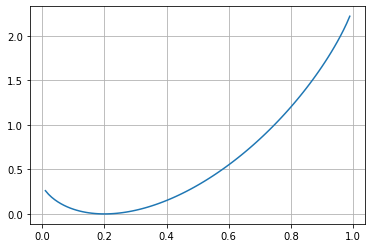

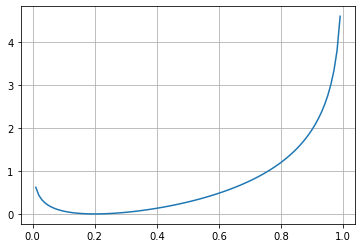

In [22]:
r = 0.2
q = np.linspace(0.01,0.99,99, endpoint=True)
fs = np.array([q,1-q])
p = np.array([r, 1-r])
div_p_q = np.zeros(99)
for i in range(99):
    div_p_q[i] = divergence(fs[:,i], p)
plt.plot(q, div_p_q)
plt.grid()
plt.show()

div_q_p = np.zeros(99)
for i in range(99):
    div_q_p[i] = divergence(p, fs[:,i])
plt.plot(q, div_q_p)
plt.grid()
plt.show()

### Part B(ii)
We find minimum values for D(p||q) and D(q||p) and thus show that D(p||q) and D(q||p) are indeed non-negative.

In [23]:
print("Minimum for D(p||q) =", np.min(div_p_q))
print("Minimum for D(q||p) =", np.min(div_q_p))

Minimum for D(p||q) = 0.0
Minimum for D(q||p) = 0.0


### Part B(iii)
From the plots above, it is clear that D(p||q) $\ne$ D(q||p). We can find when D(p||q) and D(q||p) are zero as below.

In [24]:
print("s value when D(p||q) is zero =", q[np.where(div_p_q==0)])
print("s value when D(q||p) is zero =", q[np.where(div_q_p==0)])

s value when D(p||q) is zero = [0.2]
s value when D(q||p) is zero = [0.2]


Since we used r = 0.2, we can conclude that D(p||q) $\ne$ D(q||p) and are both equal to zero only when r = s.

### Part B(iv)
Below we find the divergences of the two given images

In [25]:
unique, counts = np.unique(left.ravel(), return_counts=True)
left_pmf = np.zeros(256)
left_pmf[unique] = counts/np.prod(np.shape(left))
unique, counts = np.unique(right.ravel(), return_counts=True)
right_pmf = np.zeros(256)
right_pmf[unique] = counts/np.prod(np.shape(left))
print("D(p||q) =", divergence(left_pmf, right_pmf))
print("D(q||p) =", divergence(right_pmf, left_pmf))

D(p||q) = 0.015104015237387055
D(q||p) = 0.014409785833354484


I think D(p||q) is a good measure of image similarity as we can see that for left and right images, they are very similar and thus D(p||q) is also small. In general, KL divergence is more robust against simple data transformations like cropping and jittering. Also different orientations of same object will have low KL divergence. Thus D(p||q) is a good measure of image similarity.